## Predicting Customer Churn in Telco Industry
### Utkarsh Misra
### July, 2021
#### This notebook will contain all parts of the predictive modeling process including: data ingesting, cleaning, exploration, feature engineering (if applicable), visualization, modeling and results 

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

### Ingesting and Previewing

In [4]:
df0 = pd.read_csv('/Users/utkarshmisra/Desktop/Notes/Churn_Dataset.csv')
df = df0

### Previewing 
* 3333 instances and 21 columns including the target variable
* Out of 20 features, four are already categorical
* Previewing area code gives three distinct codes, which will be converted into categorical 
* Additional columns are added based on later data exploration, background research 

In [5]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [6]:
df.shape

(3333, 21)

In [7]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [8]:
# Three distinct 
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

#### Type Changes

In [9]:
# Changing into categorical
df['area code'] = df['area code'].astype(object)

#### New Feature Creation

In [68]:
# Based on intuition
df["mins per call"] = df["total day minutes"]/df["total day calls"]

In [11]:
# Based on explroation 
df["area_state"] = df["area code"].astype(str) + '-'+df["state"]

In [12]:
df.area_state.value_counts()

415-WV    52
415-NY    47
415-OR    44
415-WY    41
415-ID    41
          ..
408-TN    11
510-CA    10
510-HI     8
408-IA     8
408-CA     7
Name: area_state, Length: 153, dtype: int64

### Data Exploration and Cleaning
#### Here, I am following these steps for exploration and cleaning:
1. Previewing data and statistical summary to check for data integrity and outliers
2. Checking for NAs, nulls and NaNs and performing imputation if necessary 
3. Checking for duplicates and dropping them if necessary
4. Visualizing univariate distribution of all numerical data to check for outliers/skewness/whether distribution is normal(modeling)/
5. Plotting count distribution of categorical data 
6. Visualizing any possible association between independent and target variable by use of kernel plots, box plots and scatterplots
7. Any other exploration as needed

#### Summary Statistics 

In [13]:
# Only selecting numerical data
df_n = df.select_dtypes(include=['int64', 'float64'])

In [14]:
df_n.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


- No negative numbers to deal with
- Ones which might be right skewed: Intnl calls, intl charge and customer service calls. Maybe good to see the distribution on these 
- On comparing max values with 50% and 75% percentile, I don't see any strange jumps for outliers. Further outlier detection will not be necessary

#### Nulls, NAs and Duplicates

In [15]:
# counting NAs
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
area_state                0
dtype: int64

In [16]:
# Counting nulls
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
area_state                0
dtype: int64

In [17]:
# unique counts for each column
df.nunique(axis=0)

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
area_state                 153
dtype: int64

In [18]:
# Counting duplicated entries or rows
len(df[df.duplicated()])

0

#### Exploration: Numerical Data

In [14]:
test = df.pop("churn")

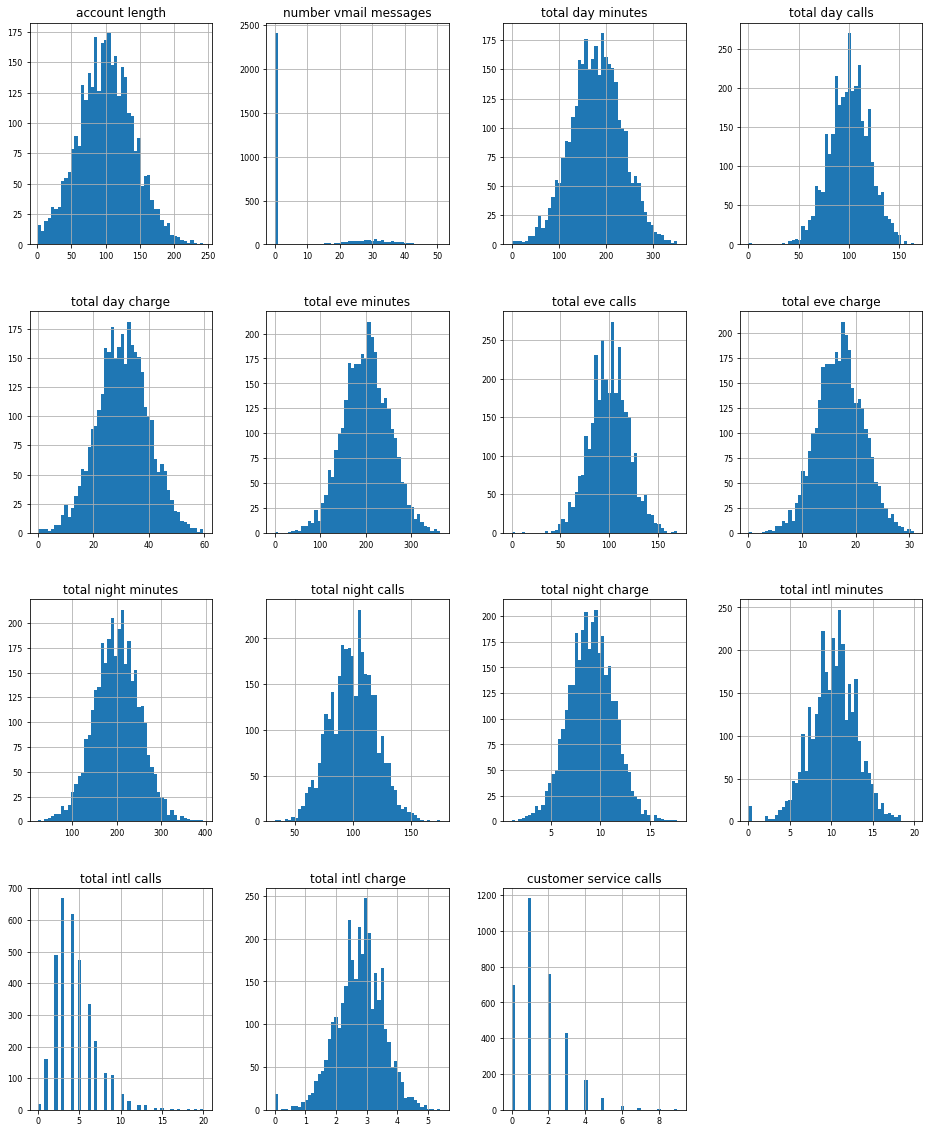

In [15]:
df_n.hist(figsize=(16, 20), bins = 50, xlabelsize=8, ylabelsize=8); 

<AxesSubplot:>

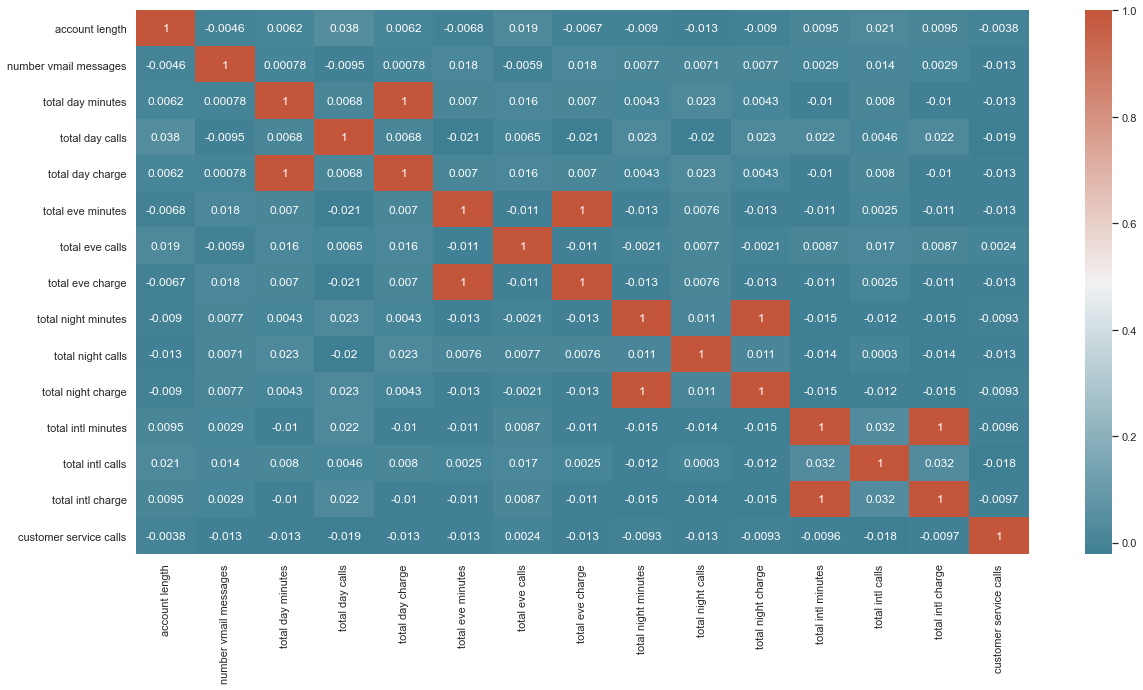

In [30]:
sns.set(rc={'figure.figsize':(20,10)})
corr = df_n.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

#### Observations
* No correlation amongst most variables so we can try and use all of them 
* Calls and minutes (day, evening, and international) are correlated 100% which makes sense since one is a function of the other. We can therefore use 3 instead of 6 variables for the mdoel in this case

#### International Calls/Minutes Exploration

<AxesSubplot:>

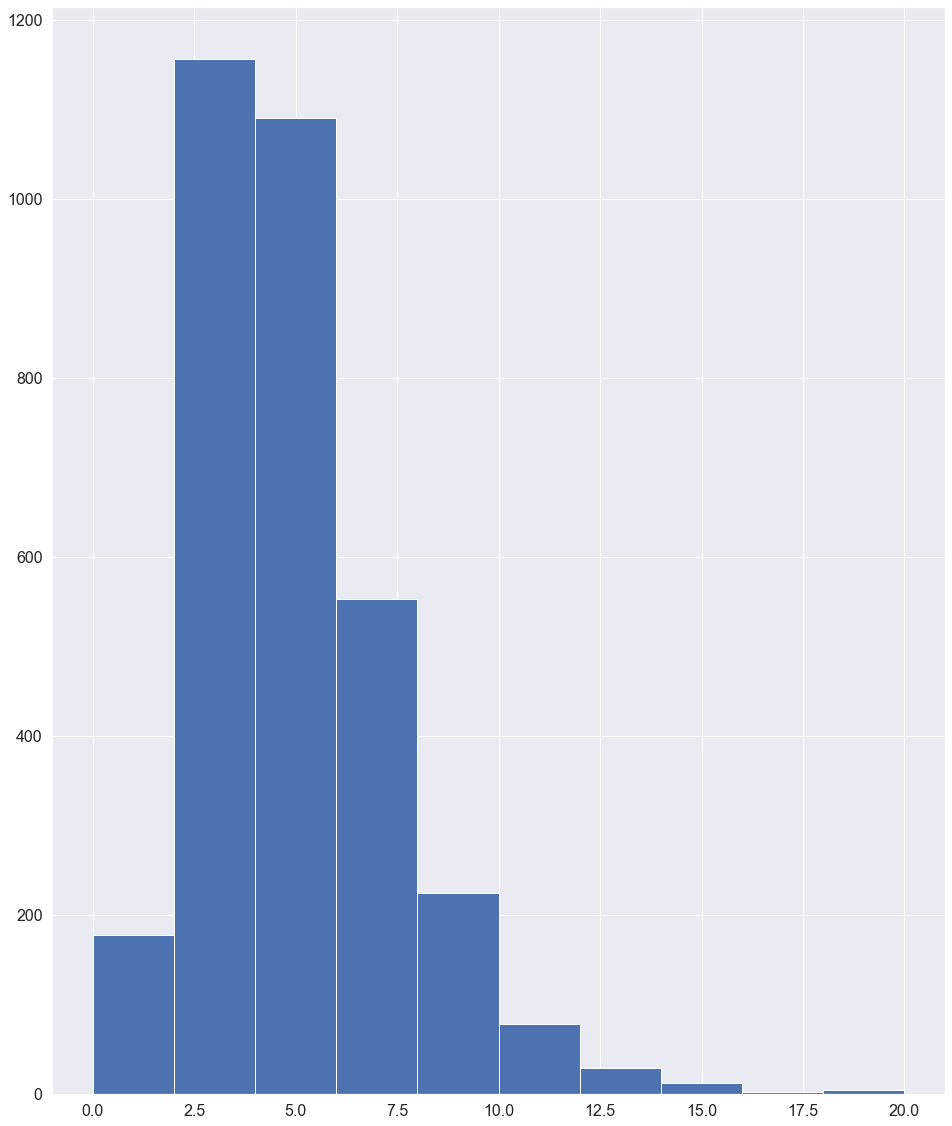

In [44]:
df_n["total intl calls"].hist(figsize=(16, 20), bins = 10, xlabelsize=16, ylabelsize=16)

Right-skewed with some outliers since 20 is max but 75% percentile is 6. 

<AxesSubplot:>

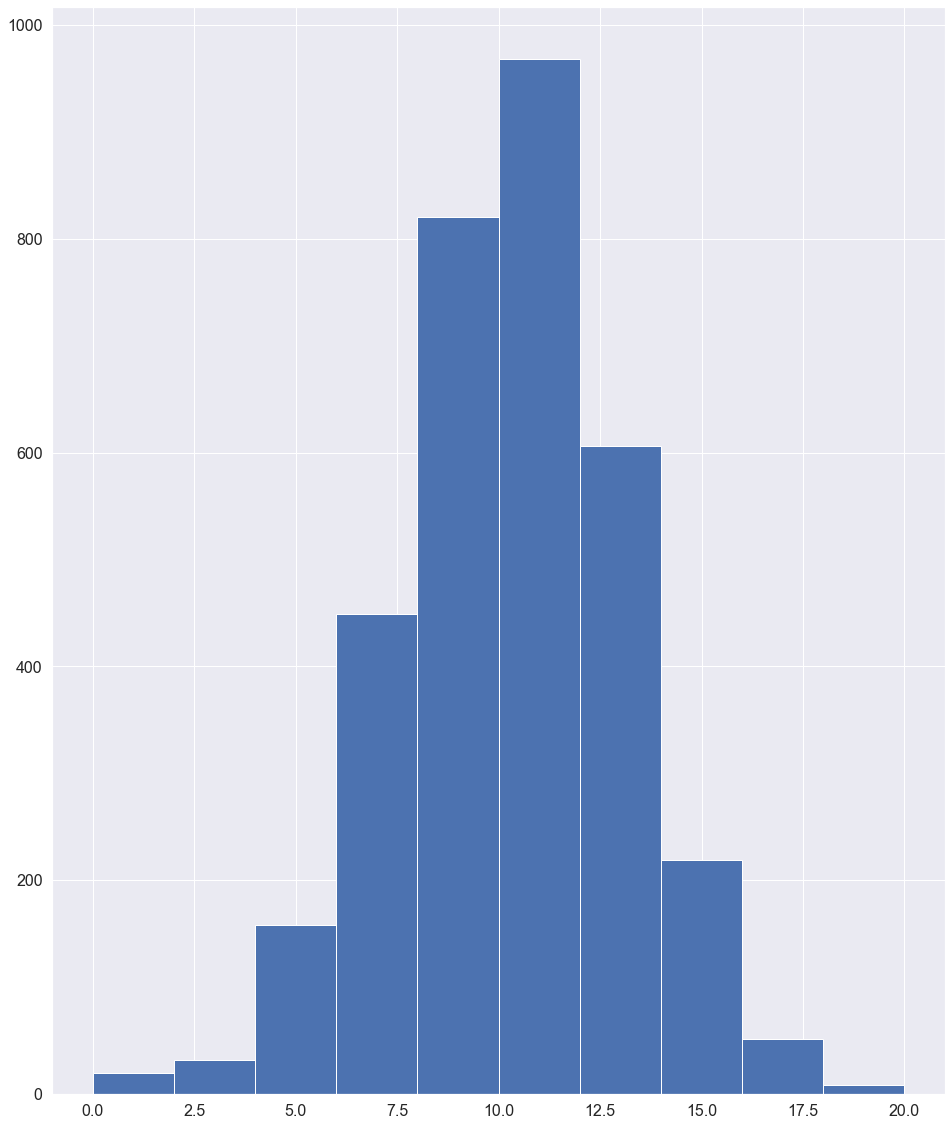

In [45]:
df_n["total intl minutes"].hist(figsize=(16, 20), bins = 10, xlabelsize=16, ylabelsize=16)

Minutes are much more uniform. Will move forward using minutes rather than number of calls across all times of day

<AxesSubplot:xlabel='total intl calls', ylabel='Density'>

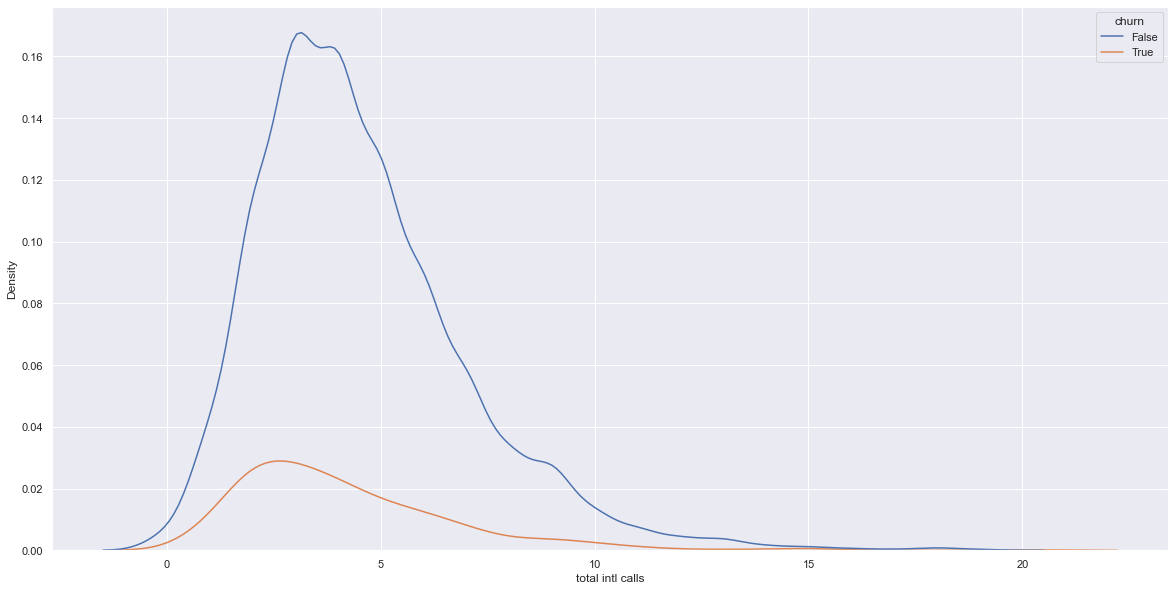

In [56]:
sns.kdeplot(data=df, x="total intl calls", hue="churn")

No distinct differences in distribution across all categories

#### Customer Service Calls

<AxesSubplot:>

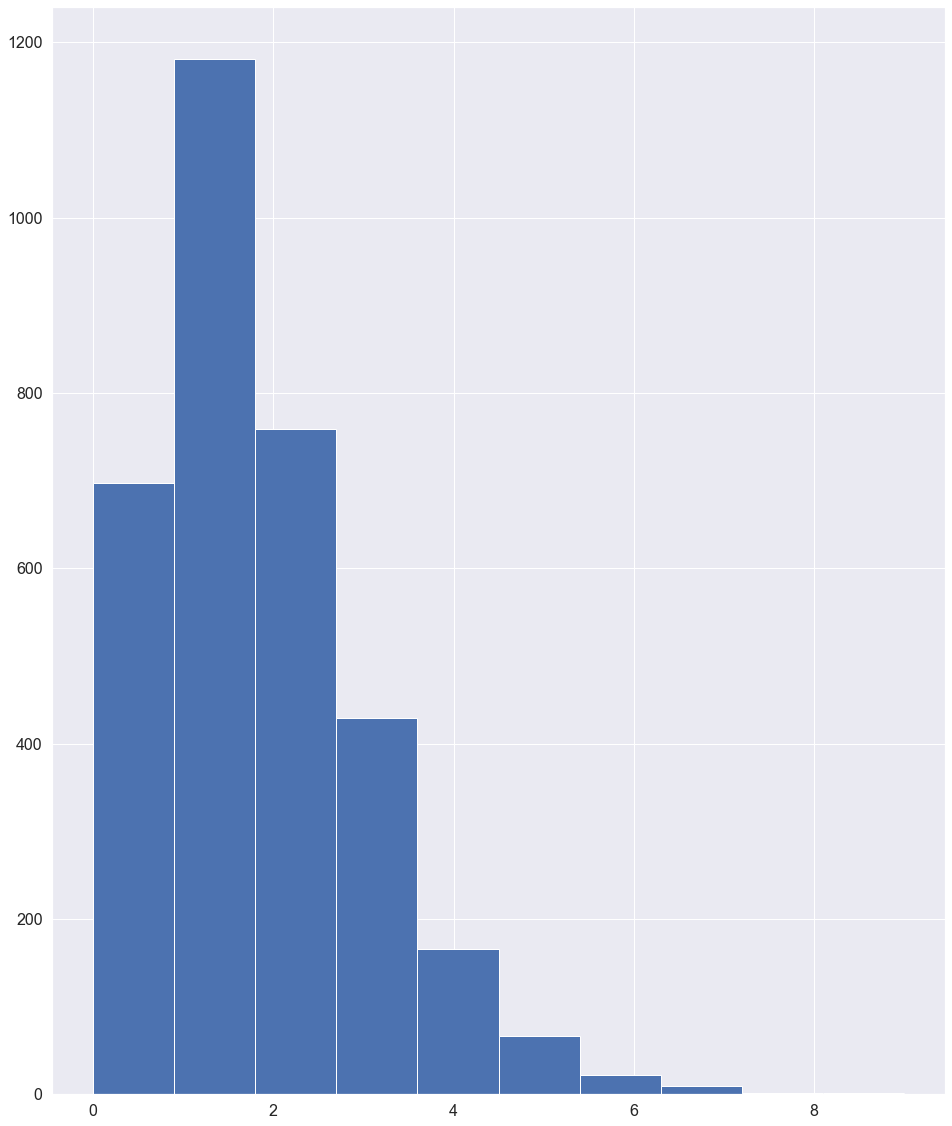

In [63]:
df_n["customer service calls"].hist(figsize=(16, 20), bins = 10, xlabelsize=16, ylabelsize=16)

<AxesSubplot:xlabel='customer service calls', ylabel='Density'>

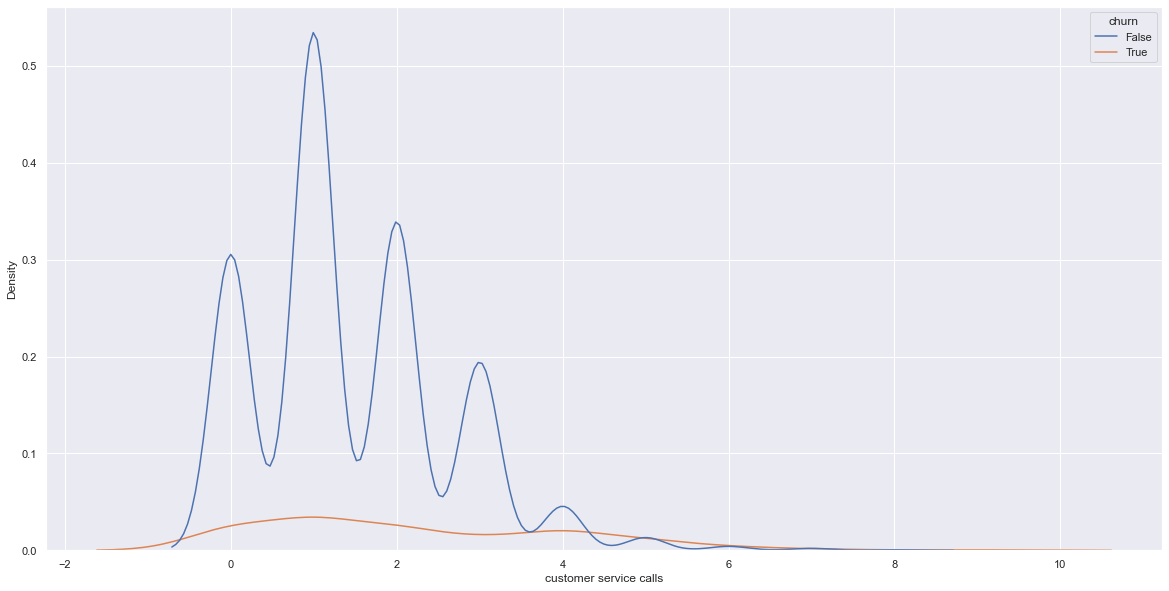

In [65]:
sns.kdeplot(data=df0, x="customer service calls", hue="churn")


<AxesSubplot:xlabel='churn', ylabel='customer service calls'>

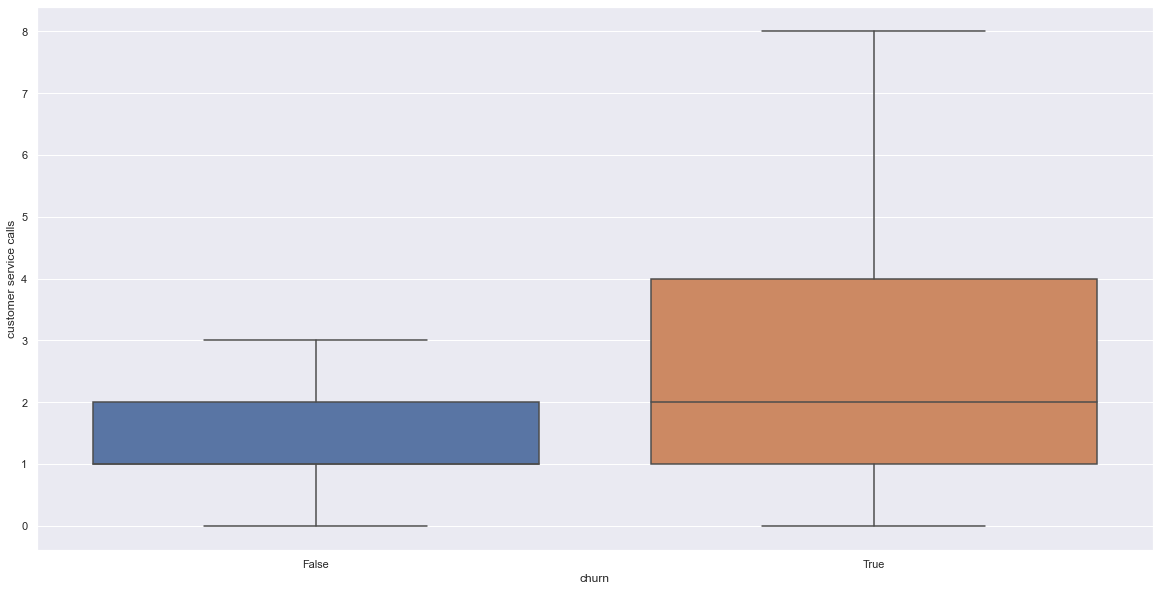

In [69]:
# Create the box plot
sns.boxplot(x = 'churn',
            y = 'customer service calls',
            data = df0,
            sym = "") 

Customer Service calls mean is higher for those who churned. The distribution has low kurtosis and is skewed more to the right for churn vs no churn. This could be a potentially powerful predictor. 

<AxesSubplot:xlabel='churn', ylabel='customer service calls'>

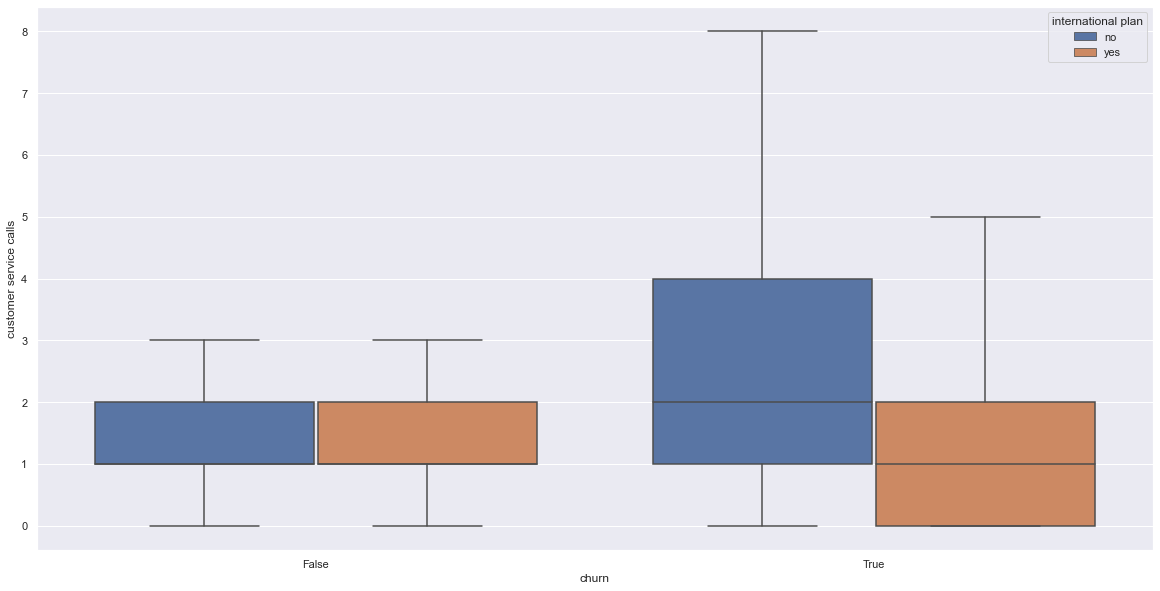

In [78]:
# Create the box plot
sns.boxplot(x = 'churn',
            y = 'customer service calls',
            data = df0,
            sym = "",
           hue = "international plan") 

<AxesSubplot:xlabel='churn', ylabel='total intl minutes'>

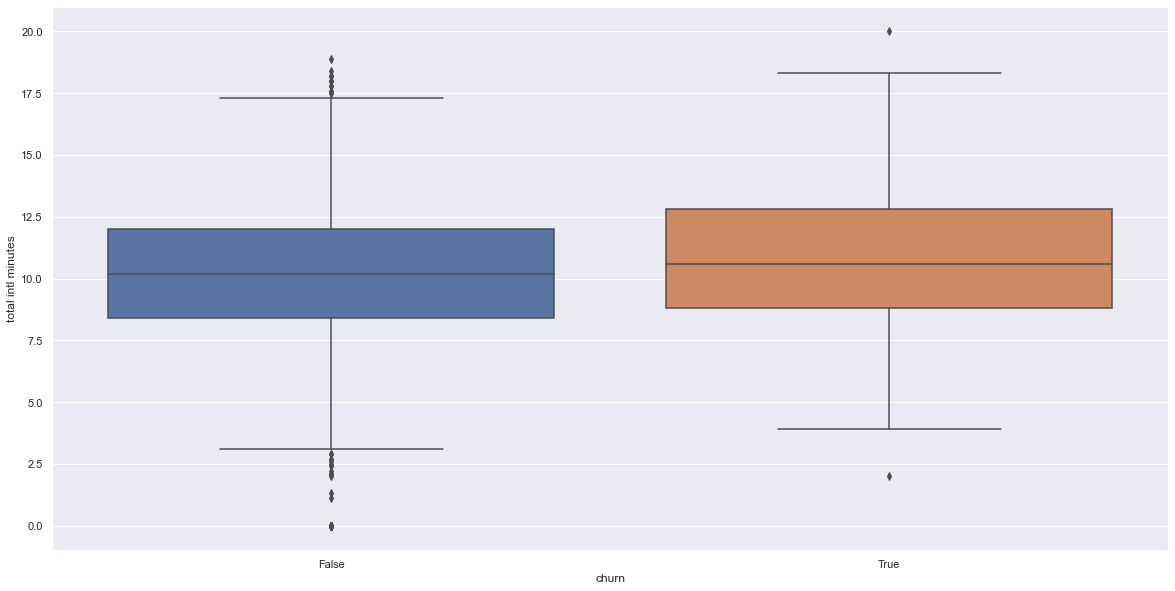

In [77]:
# Create the box plot
sns.boxplot(x = 'churn',
            y = 'total intl minutes',
            data = df0) 

**INTERESTING INSIGHT**: It seems that those who did amongst those who churned, those who did NOT have international plan called customer service more frequently.

**HYPOTHESIS:** They were disgruntled customers who were not happy about the international charge and complained to customer service. On further investigation, we find that the average number of international minutes for churners is slightly higher than non-chargers. 

**Conclusion:** There is potential for some interaction between international calls, customer service calls and its association with customer churn

#### Categorical Data: Exploration 
* 14.5% of total customers actually end up churning 
* Within the churners - 28.3% had intenrnational plan (compared to only 9% for the entire dataset - this means international plan is heavily weighted towards the churners)
* To put it another way, **42% of those who had international plan churned!! - this corresponds with our earlier hypothesis that churners (whether with or without plan) and their relationship with international calls is promising**
* Only **8% of those who churned had a voice mail system set up**, whereas overall average was 28% implying the voice mail system could be a predictor for identifying NON-churners

/Users/utkarshmisra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


False    0.855086
True     0.144914
Name: churn, dtype: float64

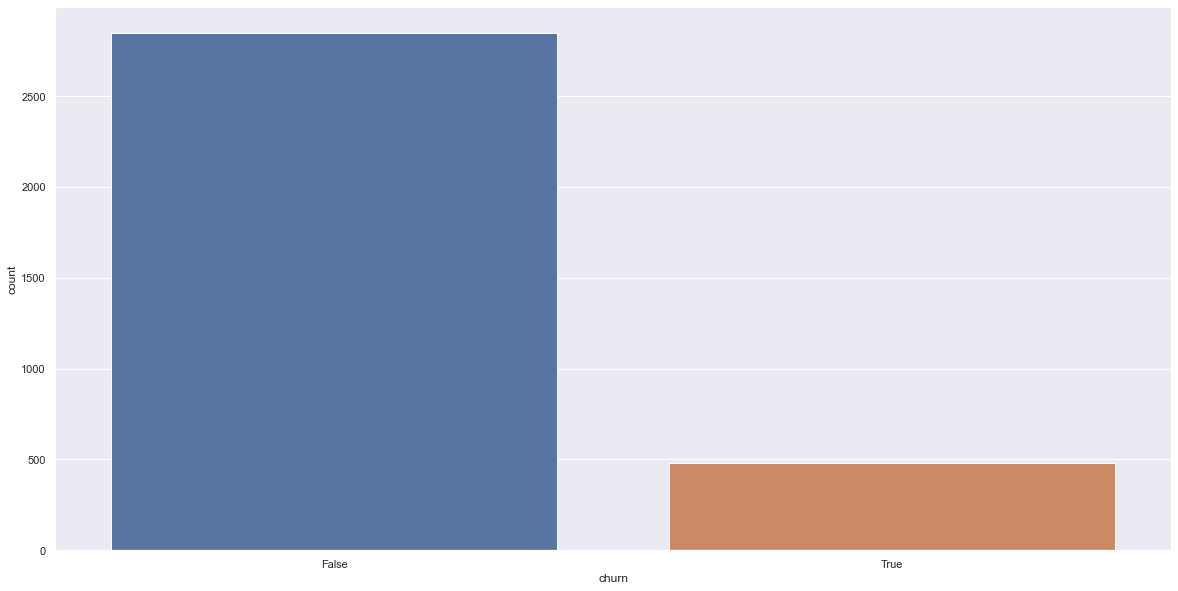

In [79]:
sns.countplot(df0["churn"])
df0.churn.value_counts(normalize=True)

In [91]:
df0['international plan'].value_counts(normalize=True)

no     0.90309
yes    0.09691
Name: international plan, dtype: float64

In [80]:
c = df0[df0["churn"] == True]
c['international plan'].value_counts(normalize=True)

no     0.716356
yes    0.283644
Name: international plan, dtype: float64

Amongst the churners, **28.3%** had **international plan**

In [92]:
i = df0[df0["international plan"] == "yes"]
i.churn.value_counts(normalize=True)

False    0.575851
True     0.424149
Name: churn, dtype: float64

Amongst those with international plan, **42.42% churned**

/Users/utkarshmisra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


no     0.723372
yes    0.276628
Name: voice mail plan, dtype: float64

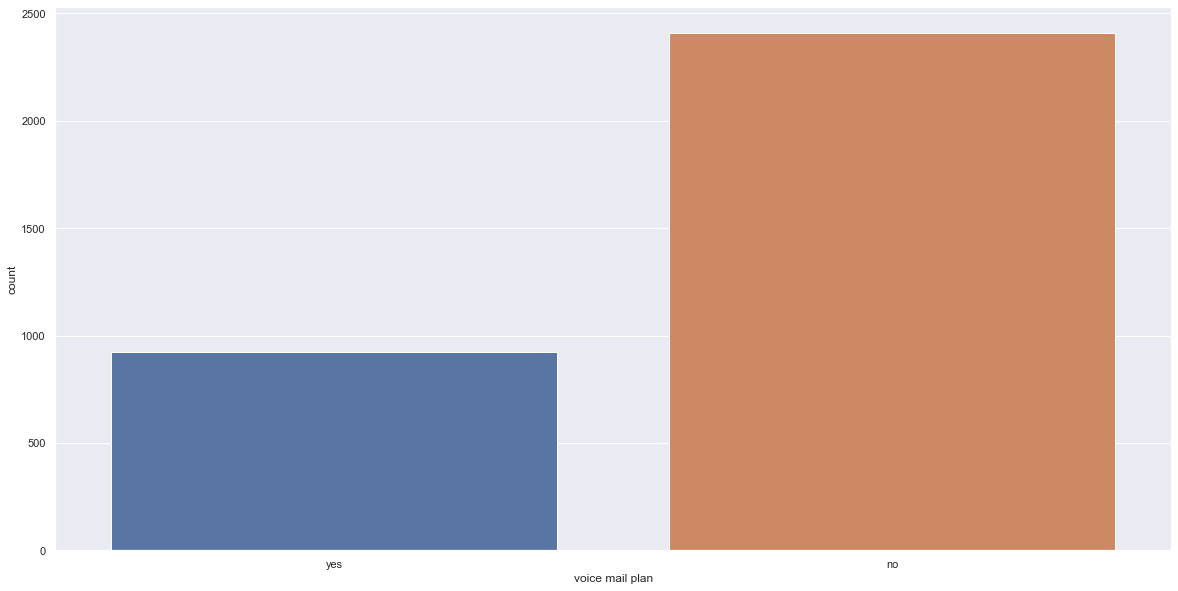

In [87]:
sns.countplot(df0["voice mail plan"])
df0["voice mail plan"].value_counts(normalize=True) # entire dataset

Out of all customers, 27% had voice mail plan

In [93]:
v = df0[df0["voice mail plan"] == "yes"]
c["voice mail plan"].value_counts(normalize=True) # only churn dataset

no     0.834369
yes    0.165631
Name: voice mail plan, dtype: float64

This drops to **16%** for the churn group. This implies that those who stayed on are more likely to have the voice mail system - this again could be a diferentiator

In [95]:
v.churn.value_counts(normalize=True)

False    0.913232
True     0.086768
Name: churn, dtype: float64

Again, the differnece is quite stark - only **8.6% of those who churned had a voice mail system set up**

### Area Code and State
* Churn by area code is very uniform. **14%** of each area code churns so not a good indicator by itself maybe
* Churn by state also yield a maximum of *26%* for New Jersey and California. 
* However, on combining both, we actually get better variation explained. 
* For insace, almost **HALF** the people in Michigan with the 408 area code churn! This could mean some regional variations in terms of perhaps the charges of customer service?

In [96]:
t = df0.groupby("area code")['state'].value_counts().sort_values(ascending=False)
t.head(50)

area code  state
415        WV       52
           NY       47
           OR       44
           ID       41
           WY       41
           AL       40
           MN       40
           OH       40
           CT       39
           MD       39
           MI       39
           UT       37
           TX       37
           KS       37
           MO       37
           AZ       36
           VT       36
           NM       35
           RI       35
           VA       35
           WI       35
           NJ       34
           MT       34
           NE       34
           NV       34
510        WV       34
415        IN       33
           KY       32
           DE       31
           FL       31
           MS       31
           HI       30
           SC       30
           TN       30
           CO       29
           MA       29
           SD       28
           NC       28
           ND       28
           IL       28
           AR       27
           DC       27
           LA    

In [103]:
a = df0["area code"].value_counts(normalize=True)
a.head()

415    0.496550
510    0.252025
408    0.251425
Name: area code, dtype: float64

Pretty evenly divided by states

In [110]:
## Average percentage of customers churned by state (highest to lower )
st = df0.groupby("state")["churn"].mean().sort_values(ascending=False)
st.head(50)

state
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
MT    0.205882
AR    0.200000
KS    0.185714
NY    0.180723
MN    0.178571
PA    0.177778
MA    0.169231
CT    0.162162
NC    0.161765
NH    0.160714
GA    0.148148
DE    0.147541
OK    0.147541
OR    0.141026
UT    0.138889
CO    0.136364
KY    0.135593
SD    0.133333
OH    0.128205
FL    0.126984
IN    0.126761
ID    0.123288
WY    0.116883
MO    0.111111
VT    0.109589
AL    0.100000
NM    0.096774
ND    0.096774
WV    0.094340
TN    0.094340
DC    0.092593
RI    0.092308
WI    0.089744
IL    0.086207
NE    0.081967
LA    0.078431
IA    0.068182
VA    0.064935
AZ    0.062500
AK    0.057692
Name: churn, dtype: float64

In [118]:
# Percentage of churners by area code
ac = df0.groupby("area code")[["churn", "customer service calls"].mean().sort_values(ascending=False)
ac.head()

SyntaxError: invalid syntax (<ipython-input-118-62f81211337f>, line 3)

In [113]:
a = df0.groupby(['area code','state'])['churn'].mean().sort_values(ascending = False)
a.head(40)

area code  state
408        MI       0.583333
           MD       0.437500
510        TX       0.400000
408        NJ       0.400000
510        NJ       0.368421
408        MS       0.333333
           KS       0.333333
415        AR       0.333333
510        SD       0.312500
           FL       0.300000
           CA       0.300000
           OK       0.294118
           SC       0.294118
415        CA       0.294118
408        MT       0.294118
510        DE       0.294118
           MN       0.291667
408        PA       0.285714
510        ME       0.272727
           MO       0.272727
408        ME       0.266667
510        MD       0.266667
415        NV       0.264706
408        RI       0.250000
415        TX       0.243243
408        CO       0.240000
415        SC       0.233333
           CT       0.230769
           WA       0.230769
           MS       0.225806
408        WA       0.217391
415        NY       0.212766
408        NY       0.210526
510        WY       0.2105

In [120]:
cs = df0.groupby(['area code','state'])['customer service calls'].mean().sort_values(ascending = False)
cs.head(40)

area code  state
408        MI       2.833333
510        CO       2.500000
415        AR       2.444444
510        OR       2.250000
408        NJ       2.200000
           KY       2.200000
510        GA       2.166667
           IA       2.125000
           MN       2.083333
408        IN       2.055556
510        CA       2.000000
408        VT       2.000000
510        AK       2.000000
           OK       1.941176
408        DE       1.923077
510        ME       1.909091
408        IA       1.875000
510        MD       1.866667
415        GA       1.857143
           LA       1.851852
           NY       1.851064
510        MS       1.842105
408        NH       1.840000
415        MS       1.838710
510        PA       1.833333
           SC       1.823529
415        WA       1.807692
408        AZ       1.800000
415        IN       1.787879
           AL       1.775000
           VA       1.771429
408        CO       1.760000
510        FL       1.750000
           TN       1.7500